<a href="https://colab.research.google.com/github/Serbeld/TensorflowKeras/blob/master/Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Tensorflow Fully-conected**

####**Autor:** Sergio Luis Beleño Díaz
####**Fecha:** 03 de Agosto del 2020

**Librería de para la lectura de datasets en formato hdf5**

In [1]:
#Instalación de h5py para la lectura de datasets en .hdf5
!pip install h5py
import h5py

**Librería para cargar el dataset desde el drive**

In [2]:
from google.colab import drive

#Se monta el uso del drive al código
drive.mount('/content/drive')

#Ubicación y nombre del archivo
hdf5_path = '/content/drive/My Drive/Dataset_MD_Incl_to_TVD.hdf5'

#Lectura del dataset
dataset = h5py.File(hdf5_path, "r")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Se importan librerías de numpy para trabajar con vectores array, 
como tambien, las librerías de ploteado en 2D y 3D**

In [3]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

#Asignación de entradas y salidas de entrenamiento
entradas = np.array(dataset["input_entrenamiento"])
salidas = np.array(dataset["output_entrenamiento"])

#Asignación de entradas y salidas de validación
entradas_val = np.array(dataset["input_validacion"])
salidas_val = np.array(dataset["output_validacion"])

#Asignación de entradas y salidas de testeo
entradas_test = np.array(dataset["input_testeo"])
salidas_test = np.array(dataset["output_testeo"])

**Dimensiones de los datasets**

In [4]:
#Tamaños o dimensiones de los datasets de entrenamiento, validación y testeo
print("Dimensión de dataset de entrenamiento: "+ str(entradas.shape))
print("Dimensión de dataset de validación: "+ str(entradas_val.shape))
print("Dimensión de dataset de testeo: "+ str(entradas_test.shape))

Dimensión de dataset de entrenamiento: (56, 3)
Dimensión de dataset de validación: (12, 3)
Dimensión de dataset de testeo: (13, 3)


####**hiperparámetros**

In [5]:
#Tasa de aprendizaje
ta = 1e-06

#Épocas
epocas = 1000

#Dimensión de la entrada a la red
shape_model = entradas.shape[1]

####**Entrenamiento**

**Se importan algunos comandos de la librería de keras en tensorflow**

In [6]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, RMSprop, SGD 
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
#Para consultar mas optimizadores buscar en la siguiente página:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [8]:
#Creamos nuestro modelo de redes neuronales artificiales

Entrada_del_modelo = Input(shape=shape_model, name='Entrada')

#Colocamos una capa de neuronas densas o Fully-conected
numero_de_neuronas = 5000

dense_1 = 800 * Dense(numero_de_neuronas, activation='tanh',name='Capa_ReLU_1')(Entrada_del_modelo)

dense_2 = Dense(10, activation='relu',name='Capa_ReLU_2')(dense_1)

dense_3 = Dense(1, activation='relu',name='Capa_ReLU_3')(dense_2)

#Modelo
modelo = Model(inputs=Entrada_del_modelo, outputs=dense_3)

#Optimizador para el ajuste de pesos
Optimizador = RMSprop(lr=ta)

modelo.compile(loss='MSE',
              optimizer=Optimizador,
              metrics=['accuracy'])

# Crea un checkpoint
model_checkpoint = ModelCheckpoint(filepath="/content/drive/My Drive/Modelo_de_la_red_neuronal.h5",
                                   monitor='val_loss', save_best_only=True)

#Summary
modelo.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
Capa_ReLU_1 (Dense)          (None, 5000)              20000     
_________________________________________________________________
tf_op_layer_Mul (TensorFlowO [(None, 5000)]            0         
_________________________________________________________________
Capa_ReLU_2 (Dense)          (None, 10)                50010     
_________________________________________________________________
Capa_ReLU_3 (Dense)          (None, 1)                 11        
Total params: 70,021
Trainable params: 70,021
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Entrenamiento
stad = modelo.fit(entradas, salidas, epochs=epocas,
                  validation_data=(entradas_val, salidas_val), 
                  callbacks = [model_checkpoint])

Epoch 1/1000
2/2 [==============================] - 1s 336ms/step - loss: 673763.8750 - accuracy: 0.0179 - val_loss: 1327106.0000 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 33ms/step - loss: 630317.8750 - accuracy: 0.0179 - val_loss: 1200161.3750 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 35ms/step - loss: 606970.8750 - accuracy: 0.0179 - val_loss: 1119328.8750 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 33ms/step - loss: 592289.8125 - accuracy: 0.0179 - val_loss: 1051605.8750 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 34ms/step - loss: 581399.8125 - accuracy: 0.0179 - val_loss: 995531.9375 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 0s 45ms/step - loss: 573326.3125 - accuracy: 0.0179 - val_loss: 948941.4375 - val_accuracy: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 0s 36ms/step 

In [10]:
modelo = load_model("/content/drive/My Drive/Modelo_de_la_red_neuronal.h5")

In [11]:
print(entradas_test)

[[4.250e+03 8.873e+01 1.000e+00]
 [4.295e+03 9.017e+01 1.000e+00]
 [4.381e+03 9.093e+01 1.000e+00]
 [4.481e+03 8.907e+01 1.000e+00]
 [4.574e+03 8.935e+01 1.000e+00]
 [4.668e+03 9.048e+01 1.000e+00]
 [4.760e+03 8.993e+01 1.000e+00]
 [4.857e+03 8.814e+01 1.000e+00]
 [4.951e+03 9.034e+01 1.000e+00]
 [5.045e+03 9.059e+01 1.000e+00]
 [5.142e+03 9.072e+01 1.000e+00]
 [5.184e+03 8.948e+01 1.000e+00]
 [5.245e+03 9.020e+01 1.000e+00]]


In [12]:
print(modelo.predict(entradas_test))

[[2748.937 ]
 [2756.4758]
 [2763.0566]
 [2758.5032]
 [2761.6033]
 [2768.1582]
 [2766.0999]
 [2756.2903]
 [2767.663 ]
 [2768.0234]
 [2767.276 ]
 [2759.195 ]
 [2762.1538]]


In [13]:
print(salidas_test)

[2733.20534497 2733.63729609 2732.81176984 2732.81176984 2734.09402155
 2734.2334715  2733.90430156 2735.53788634 2736.78475065 2736.02186255
 2734.9129384  2734.83963539 2735.00997818]


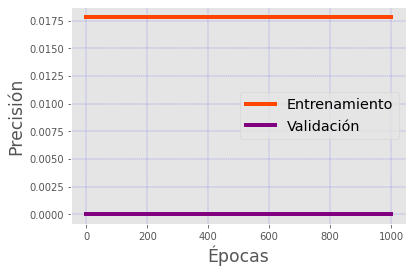

In [14]:
plt.figure(0)

plt.rcParams["figure.figsize"] = (8,5)

## explain
plt.style.use("ggplot")

plt.plot(stad.history['accuracy'],'orangered',linewidth=4)  
plt.plot(stad.history['val_accuracy'],'purple',linewidth=4)  
plt.xlabel("Épocas",fontsize = 'xx-large')  
plt.ylabel("Precisión",fontsize = 'xx-large')  

plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend(['Entrenamiento','Validación'],fontsize = 'x-large')

plt.show()

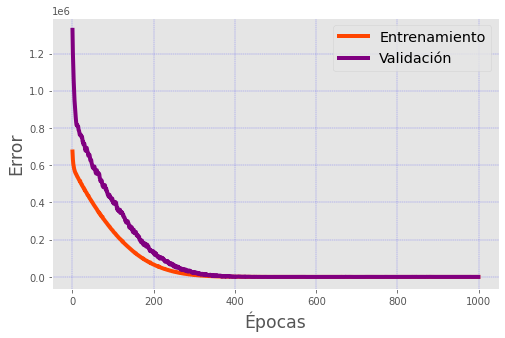

In [15]:
plt.figure(0)

plt.rcParams["figure.figsize"] = (8,5)

## explain
plt.style.use("ggplot")

plt.plot(stad.history['loss'],'orangered',linewidth=4)  
plt.plot(stad.history['val_loss'],'purple',linewidth=4)  
plt.xlabel("Épocas",fontsize = 'xx-large')  
plt.ylabel("Error",fontsize = 'xx-large')  

plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend(['Entrenamiento','Validación'],fontsize = 'x-large')

plt.show()

In [16]:
MD = entradas[:,0]
Incl = entradas[:,1]
TVD_real = salidas[:]

In [32]:
print(TVD_real)

[   0.           32.5         131.99999545  181.99993695  273.99894087
  367.99747447  458.9965092   512.99574947  561.99461151  638.99108051
  639.99101094  732.90942035  827.48885563  920.63111955 1012.41167267
 1104.78411589 1196.37111664 1287.79812037 1377.86625895 1465.81421929
 1551.73115668 1572.79       1637.31404588 1721.43285768 1803.12702882
 1882.25314776 1960.37024958 2031.01799847 2098.67033953 2102.79
 2162.47055119 2222.6185743  2223.79       2251.80111893 2276.85084868
 2280.79       2304.27876777 2327.91963218 2352.02334891 2374.57071861
 2396.2386626  2414.86880523 2432.7549858  2452.43445493 2463.41226652
 2487.14178175 2492.79       2502.79       2516.30423672 2547.78972515
 2577.75767999 2592.79       2606.40671059 2631.8174807  2653.70697869
 2672.11393605]


In [17]:
TVD_calculado_por_la_red_neuronal = modelo.predict(entradas)
print(TVD_calculado_por_la_red_neuronal)

[[   0.      ]
 [  40.071194]
 [ 146.48105 ]
 [ 212.75497 ]
 [ 299.5422  ]
 [ 379.10544 ]
 [ 460.62363 ]
 [ 511.1926  ]
 [ 558.0052  ]
 [ 632.0018  ]
 [ 633.04364 ]
 [ 735.5336  ]
 [ 846.61176 ]
 [ 949.7745  ]
 [1045.9194  ]
 [1138.533   ]
 [1246.0813  ]
 [1341.4624  ]
 [1442.7014  ]
 [1514.9683  ]
 [1599.8486  ]
 [1616.3639  ]
 [1665.4517  ]
 [1746.5964  ]
 [1830.3191  ]
 [1901.2107  ]
 [1974.059   ]
 [2049.5518  ]
 [2113.6067  ]
 [2117.7234  ]
 [2177.1846  ]
 [2236.0686  ]
 [2237.2932  ]
 [2266.5894  ]
 [2290.332   ]
 [2294.087   ]
 [2316.5625  ]
 [2338.6248  ]
 [2363.3706  ]
 [2388.9795  ]
 [2409.5396  ]
 [2427.508   ]
 [2444.8887  ]
 [2468.6604  ]
 [2481.432   ]
 [2502.6208  ]
 [2507.3298  ]
 [2515.3477  ]
 [2525.5547  ]
 [2553.132   ]
 [2572.6924  ]
 [2585.0273  ]
 [2596.4893  ]
 [2624.8472  ]
 [2647.1777  ]
 [2668.2415  ]]


In [18]:
TVD_red = []

for i in range(len(TVD_calculado_por_la_red_neuronal)):
  TVD_red.append(TVD_calculado_por_la_red_neuronal[i][0])

print(TVD_red)

[0.0, 40.071194, 146.48105, 212.75497, 299.5422, 379.10544, 460.62363, 511.1926, 558.0052, 632.0018, 633.04364, 735.5336, 846.61176, 949.7745, 1045.9194, 1138.533, 1246.0813, 1341.4624, 1442.7014, 1514.9683, 1599.8486, 1616.3639, 1665.4517, 1746.5964, 1830.3191, 1901.2107, 1974.059, 2049.5518, 2113.6067, 2117.7234, 2177.1846, 2236.0686, 2237.2932, 2266.5894, 2290.332, 2294.087, 2316.5625, 2338.6248, 2363.3706, 2388.9795, 2409.5396, 2427.508, 2444.8887, 2468.6604, 2481.432, 2502.6208, 2507.3298, 2515.3477, 2525.5547, 2553.132, 2572.6924, 2585.0273, 2596.4893, 2624.8472, 2647.1777, 2668.2415]


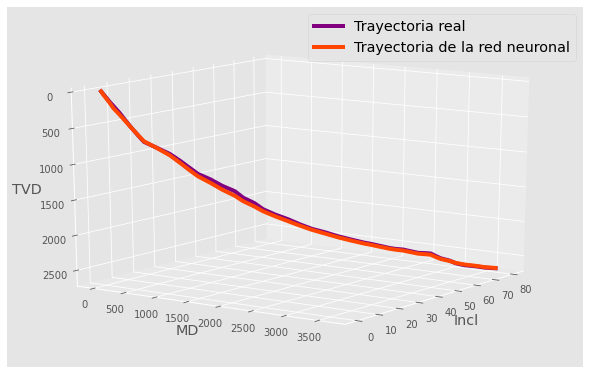

In [19]:
fig = plt.figure(1)
ax = Axes3D(fig)

ax.plot(Incl, MD, TVD_real, '-', linewidth=4, color='purple')
ax.plot(Incl, MD, TVD_red, '-', linewidth=4, color='orangered')

ax.set_xlabel('Incl', fontsize='x-large')
ax.set_ylabel('MD', fontsize='x-large')
ax.set_zlabel('TVD', fontsize='x-large')

#Orientación
ax.view_init(azim=-35, elev=-165)

plt.legend(['Trayectoria real', 'Trayectoria de la red neuronal'],
fontsize='x-large')

plt.show()

In [37]:
#Gráfica de validación
MD_v = entradas_val[:,0]
Incl_v = entradas_val[:,1]
TVD_real_v = salidas_val[:]
print("Real:")
print(TVD_real_v)
print()

TVD_red_v = []

TVD_calculado_por_la_red_neuronal_v = modelo.predict(entradas_val)

for i in range(len(TVD_calculado_por_la_red_neuronal_v)):
  TVD_red_v.append(TVD_calculado_por_la_red_neuronal_v[i][0])

print("Red neuronal:")
print(TVD_red_v)

Real:
[2680.09157471 2687.74062723 2687.79       2694.42712116 2701.07752164
 2706.08572509 2710.03947733 2717.40990192 2719.79       2725.74679963
 2730.80335997 2732.93935878]

Red neuronal:
[2675.153, 2681.353, 2681.397, 2687.3608, 2698.3748, 2707.0068, 2716.221, 2719.8022, 2722.1633, 2727.9788, 2739.856, 2747.5164]


In [38]:
#Gráfica de testeo
MD_t = entradas_test[:,0]
Incl_t = entradas_test[:,1]
TVD_real_t = salidas_test[:]
print("Real:")
print(TVD_real_t)
print()

TVD_red_t = []

TVD_calculado_por_la_red_neuronal_t = modelo.predict(entradas_test)

for i in range(len(TVD_calculado_por_la_red_neuronal_t)):
  TVD_red_t.append(TVD_calculado_por_la_red_neuronal_t[i][0])

print("Red neuronal:")
print(TVD_red_t)

Real:
[2733.20534497 2733.63729609 2732.81176984 2732.81176984 2734.09402155
 2734.2334715  2733.90430156 2735.53788634 2736.78475065 2736.02186255
 2734.9129384  2734.83963539 2735.00997818]

Red neuronal:
[2748.937, 2756.4758, 2763.0566, 2758.5032, 2761.6033, 2768.1582, 2766.0999, 2756.2903, 2767.663, 2768.0234, 2767.276, 2759.195, 2762.1538]


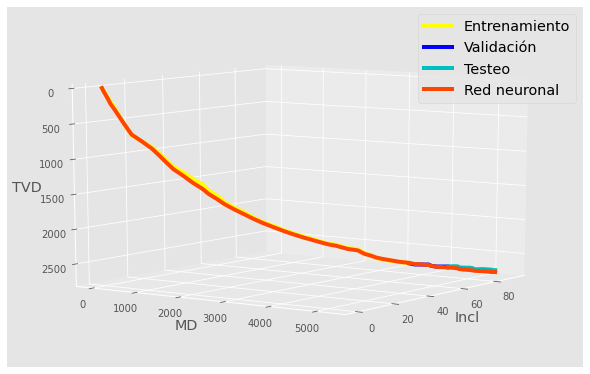

In [51]:
fig = plt.figure(2)
ax = Axes3D(fig)

ax.plot(Incl, MD, TVD_real, '-', linewidth=4, color='yellow')
ax.plot(Incl_v, MD_v, TVD_real_v, '-', linewidth=4, color='blue')
ax.plot(Incl_t, MD_t, TVD_real_t, '-', linewidth=4, color='c')
ax.plot(Incl, MD, TVD_red, '-', linewidth=4, color='orangered')
ax.plot(Incl_v, MD_v, TVD_red_v, '-', linewidth=4, color='orangered')
ax.plot(Incl_t, MD_t, TVD_red_t, '-', linewidth=4, color='orangered')

ax.set_xlabel('Incl', fontsize='x-large')
ax.set_ylabel('MD', fontsize='x-large')
ax.set_zlabel('TVD', fontsize='x-large')

#Orientación
ax.view_init(azim=-35, elev=-170)

plt.legend(['Entrenamiento', 'Validación',
            'Testeo', 'Red neuronal'],fontsize='x-large')

plt.show()